In [85]:
import pandas as aju
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
iris = load_iris()

In [11]:
#iris.data
df = aju.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
df['target'] = iris.target

In [23]:
df['names'] =  df.target.apply(lambda x:iris.target_names[x])

In [25]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [39]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

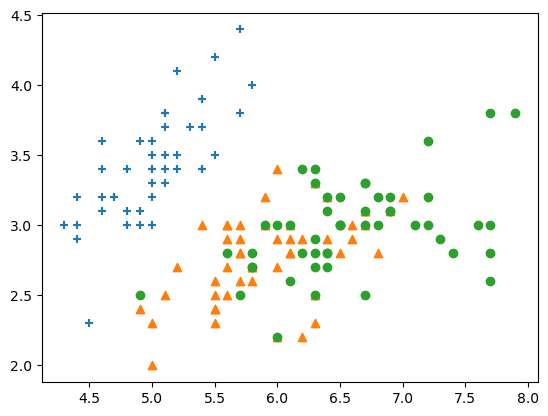

In [49]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker = '^')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'])

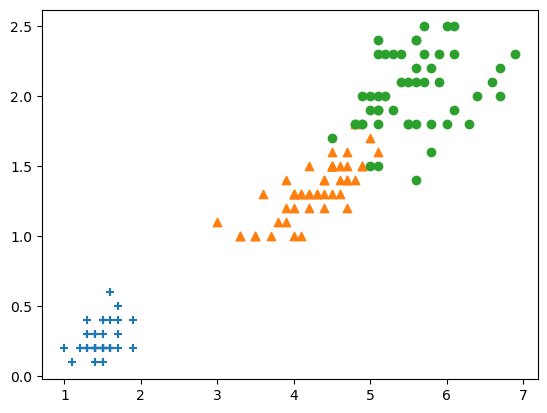

In [51]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker = '^')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])

In [57]:
x = df.drop(['target','names'],axis='columns')
y = df.target

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 99)

In [71]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9777777777777777

In [81]:
y_pred = knn.predict(x_test)
cmap = confusion_matrix(y_test,y_pred)
cmap

array([[12,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 14]], dtype=int64)

<Axes: >

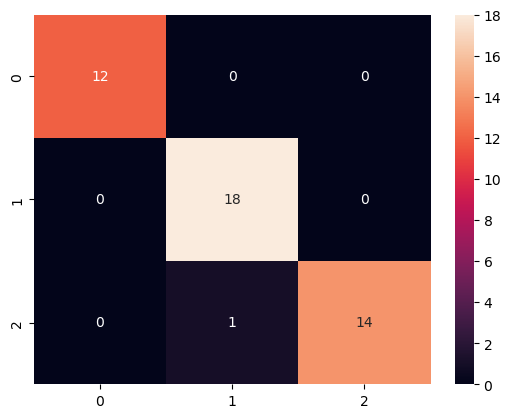

In [83]:
sns.heatmap(cmap,annot=True)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

